# Projet : Python for data analysis

Auteur : Xavier ALEXIADE

Groupe : DIA 2

# Analyse des données
---

## Intro

In [1]:
#pour l'analyse de la donnée
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#libraries machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score#, log_loss
from sklearn import preprocessing

#pour alléger les résultats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#on charge le fichier de donnée
filename = "./datasets/page-blocks.data"

#noms des colonnes non existant dans le fichier avec les données
names = ["HEIGHT", "LENGTH", "AREA", "ECCEN", "P_BLACK", "P_AND", "MEAN_TR", "BLACKPIX", "BLACKAND", "WB_TRANS", "CLASSES"]

In [3]:
dataset = pd.read_csv(filename, header=None, delimiter=r"\s+")
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [4]:
#on change le nom des colonnes
dataset.columns = names

dataset.head()

,HEIGHT,LENGTH,AREA,ECCEN,P_BLACK,P_AND,MEAN_TR,BLACKPIX,BLACKAND,WB_TRANS,CLASSES
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [5]:
#on vérifie qu'il a bien tout pris en compte
dataset.info()
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HEIGHT    5473 non-null   int64  
 1   LENGTH    5473 non-null   int64  
 2   AREA      5473 non-null   int64  
 3   ECCEN     5473 non-null   float64
 4   P_BLACK   5473 non-null   float64
 5   P_AND     5473 non-null   float64
 6   MEAN_TR   5473 non-null   float64
 7   BLACKPIX  5473 non-null   int64  
 8   BLACKAND  5473 non-null   int64  
 9   WB_TRANS  5473 non-null   int64  
 10  CLASSES   5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


Index(['HEIGHT', 'LENGTH', 'AREA', 'ECCEN', 'P_BLACK', 'P_AND', 'MEAN_TR',
       'BLACKPIX', 'BLACKAND', 'WB_TRANS', 'CLASSES'],
      dtype='object')

In [6]:
#on se donne une idée des statistiques du dataset
dataset.describe()

,HEIGHT,LENGTH,AREA,ECCEN,P_BLACK,P_AND,MEAN_TR,BLACKPIX,BLACKAND,WB_TRANS,CLASSES
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [7]:
#résultats possibles dans le dataset
dataset.CLASSES.unique()

array([1, 2, 4, 5, 3])

D'après le fichier `page-blocks.names`, ce dataset est un ensemble d'analyses de blocs de différents documents. Ces analyses peuvent être utilisées pour retrouver si un bloc est en fait un texte, une ligne verticale/horizontale ou une image.

Ainsi, le dataset a pour informations sur le document : 
- height : la hauteur du bloc
- lenght : la longueur du bloc
- area : la surface du bloc
- eccen : le rapport longueur/hauteur du bloc
- p_black : le % de pixels noirs dans la surface
- p_and : le % de pixels noirs après l'application du RLSA
- mean_tr : la moyenne de transition pixel blanc/noir
- blackpix : le nombre total de pixels noirs dans le bloc
- blackand : le nombre total de pixels noirs dans le bloc après le RLSA
- wb_trans : le nombre total de transition pixel blanc/noir

L'analyse de ces données peut donner comme résultat une de ces catégories :
1. texte
1. ligne horizontale
1. image
1. ligne verticale
1. graphique

Avec un modèle de machine learning on va donc essayer de prédire au mieu un ensemble de données tests.
Les classes étant peu nombreuses on peut garder celles fournies.

# Utilisation de Pandas pour mettre en valeurs le dataset
---

## Nombre d'occurences de chaque classe

In [8]:
#nombre de fois que chaque classe apparait
dataset["CLASSES"].value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: CLASSES, dtype: int64

## Valeurs moyennes des classes

In [9]:
#on change le numéro de la classe par sa valeur en string
colonnes = ('texte', 'ligne horizontale', 'image', 'ligne verticale', 'graphique')
mean_all = dataset
mean_all.CLASSES.replace((1, 2, 3, 4, 5), colonnes, inplace=True)
mean_all.sample(10)

,HEIGHT,LENGTH,AREA,ECCEN,P_BLACK,P_AND,MEAN_TR,BLACKPIX,BLACKAND,WB_TRANS,CLASSES
1981,7,8,56,1.143,0.393,1.000,1.69,22,56,13,texte
1129,8,69,552,8.625,0.415,0.984,2.16,229,543,106,texte
758,12,8,96,0.667,0.438,0.510,42.00,42,49,1,texte
2307,7,8,56,1.143,0.464,0.768,2.17,26,43,12,texte
973,10,108,1080,10.800,0.319,0.746,2.14,345,806,161,texte
4289,23,124,2852,5.391,0.941,1.000,17.21,2684,2852,156,texte
2181,9,17,153,1.889,0.307,0.987,1.38,47,151,34,texte
698,10,46,460,4.600,0.363,0.843,2.01,167,388,83,texte
1937,9,20,180,2.222,0.294,0.578,1.51,53,104,35,texte
3042,10,16,160,1.600,0.300,1.000,1.85,48,160,26,texte


In [10]:
# pour chaque classe quel est le rapport moyen de chaque données du tableau
mean_all = mean_all.groupby("CLASSES").mean()
mean_all

,HEIGHT,LENGTH,AREA,ECCEN,P_BLACK,P_AND,MEAN_TR,BLACKPIX,BLACKAND,WB_TRANS
CLASSES,,,,,,,,,,
graphique,43.660870,89.965217,9513.782609,2.064878,0.182183,0.444061,6.681130,1250.626087,2435.539130,210.895652
image,100.535714,153.071429,21448.035714,1.401571,0.498250,0.670607,33.368214,9876.142857,13185.750000,666.071429
ligne horizontale,2.544073,141.875380,509.303951,79.442830,0.669207,0.836845,46.629088,279.805471,324.404255,12.826748
ligne verticale,42.954545,2.431818,260.534091,0.424648,0.857500,0.887000,24.029091,60.909091,71.704545,7.761364
texte,9.132302,87.255038,951.303888,9.937869,0.343385,0.788392,3.028687,302.253002,670.416853,109.090169


<AxesSubplot:xlabel='CLASSES'>

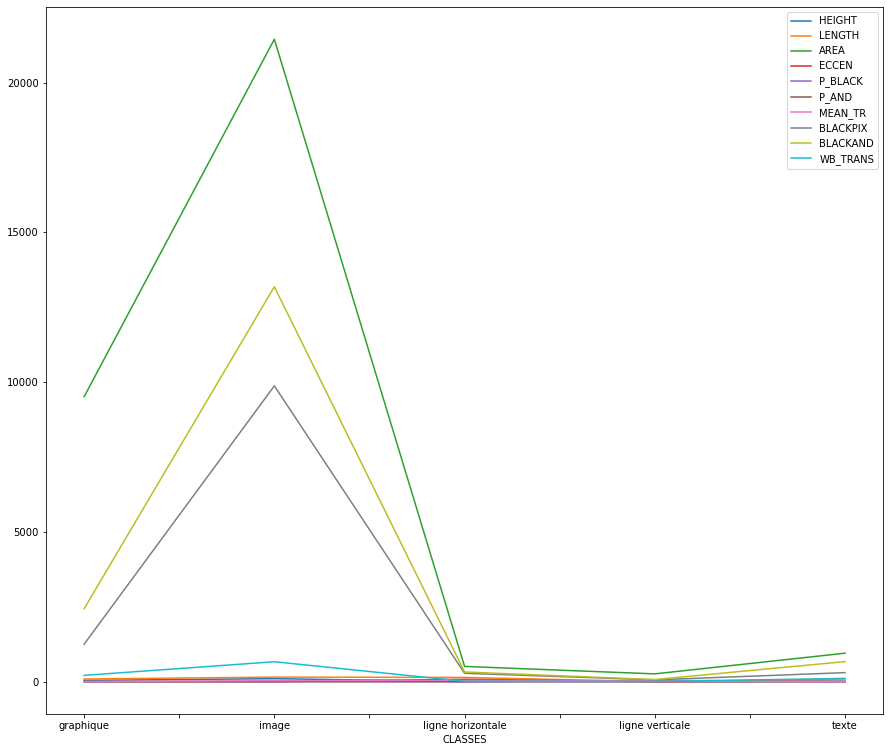

In [11]:
mean_all.plot(figsize=(15,13), grid=False)

On remarque plusieurs choses : 
- la surface du bloc est souvent beaucoup plus grande lorsque que celui ci est une image
- le nombre de pixels blancs et noirs est proportionnel à la surface du bloc : plus la surface est élevée plus le nombre de pixels, blancs ou noirs, est élevé

Intéressons nous maintenant aux autres colonnes sans les 3 déjà citées :

<AxesSubplot:xlabel='CLASSES'>

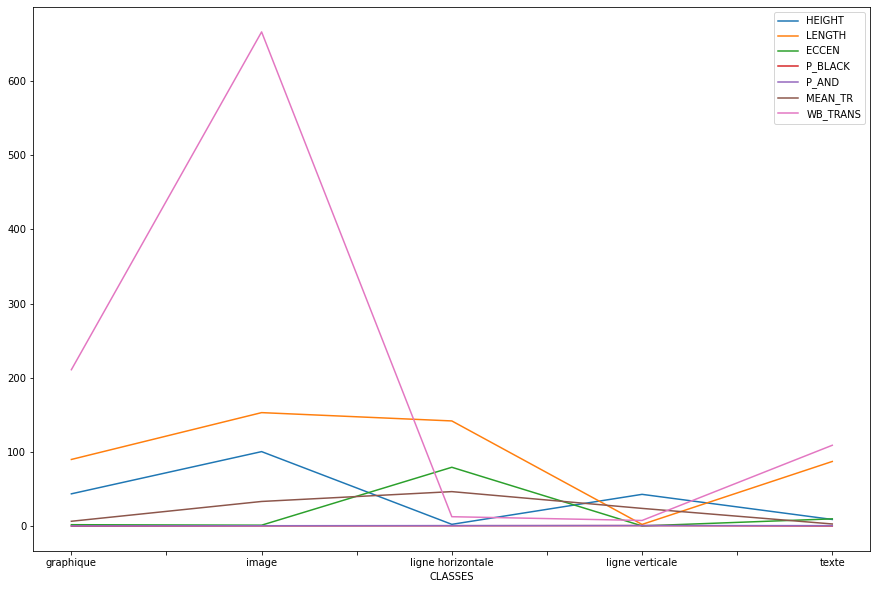

In [12]:
mean_all[["HEIGHT", "LENGTH", "ECCEN", "P_BLACK", "P_AND", "MEAN_TR", "WB_TRANS"]].plot(figsize=(15,10), grid=False)

On remarque que la transition noir/blanc est très peu présente sur 2 classes : la classe 2 (ligne horizontale) et la 4 (ligne verticale).

Cette information s'avère intéressante afin de distinguer les lignes du reste des autres classes.

Voyons ce que ça donne sans WB_TANS :

<AxesSubplot:xlabel='CLASSES'>

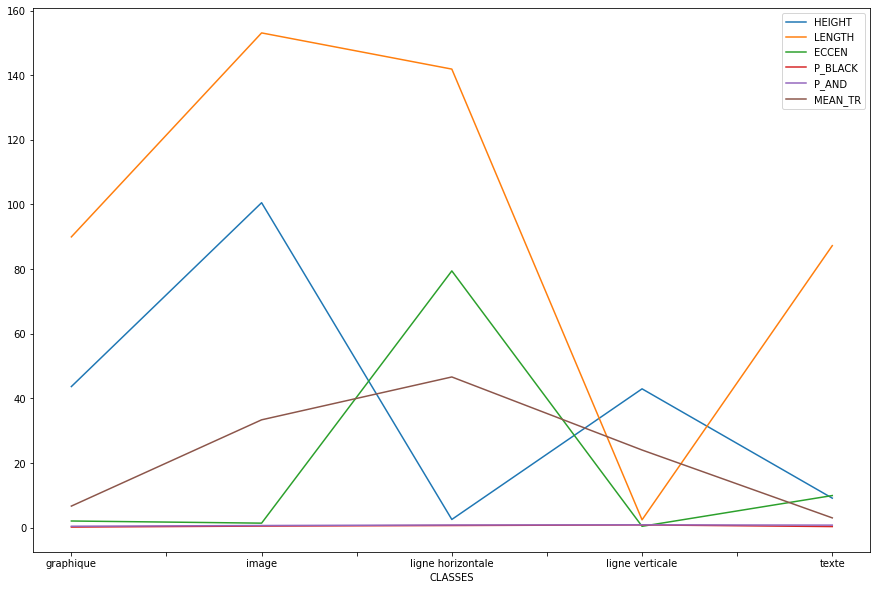

In [13]:
mean_all[["HEIGHT", "LENGTH", "ECCEN", "P_BLACK", "P_AND", "MEAN_TR"]].plot(figsize=(15,10), grid=False)

Ici on remarque :
- la classe 2 est beaucoup plus excentré que toutes les autres

Ainsi, après ces graphiques on peut déjà faire une pré-évaluation des données en se basant sur les valeurs en pics dans les colonnes relevées pour se donner une idée de la classe d'un individu.

# Etude et prédiction :
---

## Travail de la donnée préparatoire :

In [14]:
#on stocke la colonne à prédire
labels = dataset["CLASSES"]

#on enleve la colonne à prédire
features = dataset.drop("CLASSES", axis = 1)

#liste des noms des colonnes
feature_list = list(features.columns)

#on converti les features en numpy array pour l'analyse
features = np.array(features)

Séparation en training set et test set :

In [15]:
#séparation de la data à l'aide de la librairie
training_set, test_set, train_lab, test_lab = train_test_split(features, labels, test_size = 0.2, random_state = 48)

`test_size` indique la proportion de data que l'on garde afin de tester le modèle

`random_state` est là pour le confort du test afin de toujours avoir les même valeurs

In [16]:
#Vérification des dimensions des variables
print(f'Dim de training_set :\t{training_set.shape}')
print(f'Dim de train_lab :\t{train_lab.shape}')

print(f'Dim de test_set :\t{test_set.shape}')
print(f'Dim de test_lab :\t{test_lab.shape}')

Dim de training_set :	(4378, 10)
Dim de train_lab :	(4378,)
Dim de test_set :	(1095, 10)
Dim de test_lab :	(1095,)


## Classification

### Méthode 1 : KNN (K Nearest Neighbor)

In [17]:
X = training_set
Y = train_lab

In [18]:
#Train Model and Predict  
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=6)
KNN = KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train)

print("Accuracy du training set : ", metrics.accuracy_score(Y_train, KNN.predict(X_train)))
print("Accuracy du test set : ", metrics.accuracy_score(Y_valid, KNN.predict(X_valid)))
KNN

Accuracy du training set :  0.9691604797258709
Accuracy du test set :  0.958904109589041


KNeighborsClassifier(n_neighbors=4)

### Méthode 2 : Decision tree

In [19]:
#Profondeur de 10 semble correcte
DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT = DT.fit(X, Y)

In [20]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_valid, DT.predict(X_valid)))

DecisionTrees's Accuracy:  0.9931506849315068


### Méthode 3 : SVM (Support Vector Machine)

In [21]:
svm = SVC(gamma='auto')
svm = svm.fit(X, Y)

In [22]:
print("F1-score du training set : ", f1_score(Y_train, KNN.predict(X_train), average='weighted'))
print("F1-score du test set : ", f1_score(Y_valid, KNN.predict(X_valid), average='weighted'))

F1-score du training set :  0.9689474709604172
F1-score du test set :  0.9523427878472231


## Conclusion (F1-score)

In [23]:
X_test = preprocessing.StandardScaler().fit(test_set).transform(test_set)
Y_test = test_lab

In [24]:
KNN_pred = KNN.predict(X_test)
DT_pred = DT.predict(X_test)
svm_pred = svm.predict(X_test)

In [25]:
F1_score = [f1_score(Y_test, KNN_pred, average='weighted'),
            f1_score(Y_test, DT_pred, average='weighted'),
            f1_score(Y_test, svm_pred, average='weighted')]

In [26]:
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM'], 'F1-score': F1_score}
df_final = pd.DataFrame(data=df, columns=['Algorithm', 'F1-score'], index=None)
df_final

,Algorithm,F1-score
0,KNN,0.436084
1,Decistion Tree,0.807865
2,SVM,0.830910


# Sauvegarde du modèle le plus performant

In [29]:
import joblib

joblib.dump(svm, './page-blocks.mdl')

['./page-blocks.mdl']